In [1]:
%reload_ext autoreload
%autoreload 2

import navsim
import gym
import matplotlib.pyplot as plt
import numpy as np

[INFO] Navsim is using cv2 as image library
[INFO] Adding navsim-v0 to Gym registry


In [2]:
env_config = navsim.util.ObjDict({
        "env_path": "/data/work/unity-envs/Build2.10.0/Berlin_Walk_V2.x86_64",
        "log_folder":"./env_log", 
        "task": 0,
        "goal": 0,
        "goal_distance": 50,
        "reward_for_goal": 50,
        "reward_for_no_viable_path":-50,
        "reward_step_mul": 0.1,
        "reward_collision_mul": 4,
        "reward_spl_delta_mul": 1,
        "agent_car_physics": 0,   
        "debug":False,
        "obs_mode":0,
        "seed":123,
        "save_vector_obs":True,
        "save_visual_obs":True
    })

In [3]:
# look at all 3 observation modes

for i in [0,1,2]:
    env_config["obs_mode"]=i
    env = gym.make("navsim-v0", env_config=env_config) # navsim.NavSimGymEnv(env_config)
    env.info()
    env.close()
    del env

[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005
[INFO] Connected new brain: VectorNavigator?team=0


/opt/conda/envs/navsim/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


-----------
Env Info
-----------
navsim-v0
Action Space: Box(-1.0, 1.0, (3,), float32)
Action Space Shape: (3,)
Action Space Low: [-1. -1. -1.]
Action Space High: [1. 1. 1.]
Observation Mode: 0
Observation Space: Tuple(Box(-inf, inf, (16,), float32))
Observation Space Shape: None
Observation Space Shapes: [(16,)]
Observation Space Types: [<class 'gym.spaces.box.Box'>]
Reward Range: (-inf, inf)
Metadata: {'render.modes': ['rgb_array', 'depth', 'segmentation']}
--------------------------------------
[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005
[INFO] Connected new brain: VisualNavigator?team=0
-----------
Env Info
-----------
navsim-v0
Action Space: Box(-1.0, 1.0, (3,), float32)
Action Space Shape: (3,)
Action Space Low: [-1. -1. -1.]
Action Space High: [1. 1. 1.]
Observation Mode: 1
Observation Space: Tuple(Box(0.0, 1.0, (64, 64, 3), float32), Box(0.0, 1.0, (64, 64, 1), float32), Box(0

In [4]:
# test for ten steps forward and ten steps back and navigable map example

env_config["obs_mode"]=2
env = gym.make("navsim-v0", env_config=env_config)
env.start_navigable_map()
print(env.reset()[-1])
navigable_map = env.get_navigable_map()
#action_sample = env.action_space.sample()
print("Forward:")
for i in range(0,10):
    action_sample = [1,0,0]
    print(env.step(action_sample)[0][-1])
print("Backward:")
for i in range(0,10):
    action_sample = [-1,0,0]
    print(env.step(action_sample)[0][-1])
#action_sample = env.action_space.sample()
#action_sample = [-1,0,0]
#print(action_sample)
#s2 = env.step(action_sample)
env.close()

[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5005
[INFO] Connected new brain: VectorVisualNavigator?team=0
[ 6.8400000e+02  3.4653484e+01  2.7759998e+02  0.0000000e+00
  0.0000000e+00  0.0000000e+00  1.8626447e-09 -0.0000000e+00
 -0.0000000e+00  1.0000000e+00  7.3286072e+02  3.4665352e+01
  2.7232281e+02  1.3520508e+01  3.0827490e+01  2.5037100e+01]
Forward:
[ 6.8400000e+02  3.4652504e+01  2.7764001e+02  0.0000000e+00
 -9.8001897e-02  0.0000000e+00  1.3969840e-09 -0.0000000e+00
 -0.0000000e+00  1.0000000e+00  7.3286072e+02  3.4665352e+01
  2.7232281e+02  1.3470261e+01  3.0834826e+01  2.4960148e+01]
[ 6.8400000e+02  3.4650543e+01  2.7768005e+02  0.0000000e+00
 -1.9590580e-01  0.0000000e+00  1.3969840e-09 -0.0000000e+00
 -0.0000000e+00  1.0000000e+00  7.3286072e+02  3.4665352e+01
  2.7232281e+02  1.3409790e+01  3.0842062e+01  2.4857193e+01]
[ 6.8400000e+02  3.4647606e+01  2.7772009e+02  0.00

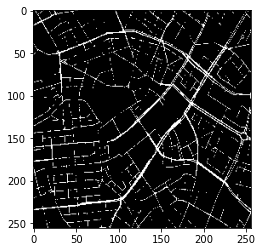

In [5]:
plt.imshow(navigable_map,cmap='gray', vmin=0, vmax=1)

In [7]:
# test for seeds for reset() and action samples

num_episodes=10
num_steps=10
num_actions = 3

for seed in [123,321]:
    env_config["seed"]=seed
    reset_obs=np.full((num_episodes,16),0.0)
    actions=np.full((num_episodes,num_steps,3),0.0)
    env = gym.make("navsim-v0", env_config=env_config) 
    for i in range(0,num_episodes):
        reset_obs[i,:] = env.reset()[-1]
        for j in range(0,num_steps):
            #for k in range(0,num_actions)
            actions[i,j,:]=env.action_space.sample()
    env.close()
    del env
    print(reset_obs)
    print(actions)


[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment at port 5006
[INFO] Connected new brain: VectorVisualNavigator?team=0
[[ 6.84000000e+02  3.46534843e+01  2.77599976e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.86264471e-09 -0.00000000e+00
  -0.00000000e+00  1.00000000e+00  7.32860718e+02  3.46653519e+01
   2.72322815e+02  1.35205078e+01  3.08274899e+01  2.50370998e+01]
 [ 2.14319995e+03  4.62534828e+01  2.52720020e+03  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  1.00000000e+00  2.13500635e+03  4.55700684e+01
   2.56629541e+03  3.15871501e+00  1.32487402e+01  2.70496440e+00]
 [ 3.24000000e+02  3.42534828e+01  1.11280005e+03  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  1.00000000e+00  2.77418213e+02  3.42553024e+01
   1.11705005e+03  7.41398144e+00  9.48952866e+00  1.17129707e+01]
